In [2]:
# Instalação de bibliotecas (execute apenas se necessário)
!pip install pandas-profiling sweetviz missingno plotly

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 25.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e40cf88b515b182469608fd349c1c12df9340f0749f8a8003b7fac9152fea252
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-

In [3]:
# Importação de todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configuração de estilo
plt.style.use('ggplot')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [5]:
# Carregar o dataset
df = pd.read_csv('hotel_bookings.csv')

In [6]:
# Primeira visualização
print("📊 DIMENSÕES DO DATASET:")
print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

📊 DIMENSÕES DO DATASET:
Linhas: 119390
Colunas: 32


In [7]:
print("\n👀 PRIMEIRAS LINHAS:")
display(df.head())


👀 PRIMEIRAS LINHAS:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
print("\n📋 INFORMAÇÕES GERAIS:")
df.info()


📋 INFORMAÇÕES GERAIS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64 

In [9]:
print("🔍 ANÁLISE DE VALORES FALTANTES:")

# Análise percentual de valores nulos
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({
    'Valores Faltantes': missing_data,
    'Percentual (%)': missing_percent
})
display(missing_df[missing_df['Valores Faltantes'] > 0])

🔍 ANÁLISE DE VALORES FALTANTES:


,Valores Faltantes,Percentual (%)
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


<Figure size 1200x600 with 0 Axes>

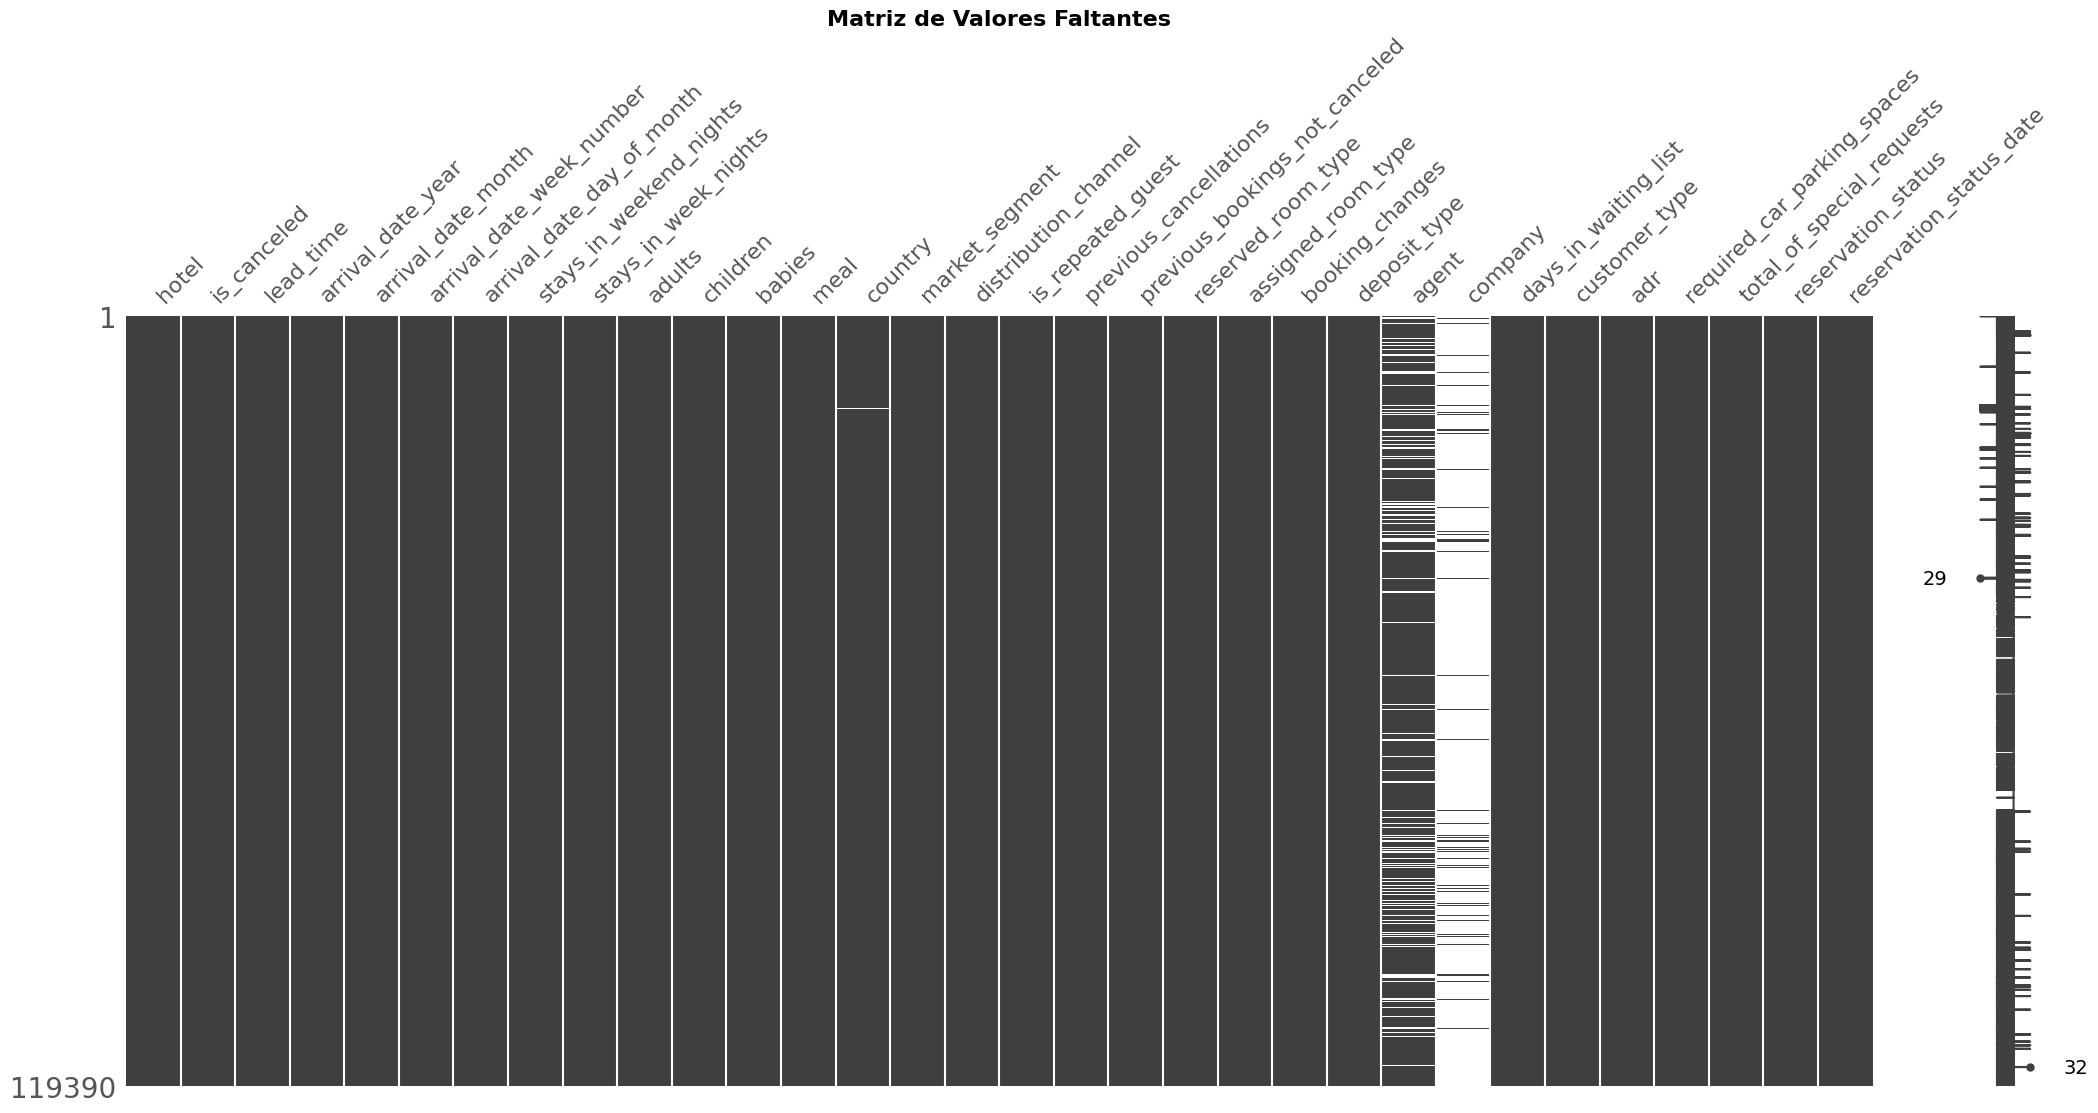

In [10]:
# Visualização matricial de valores faltantes
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Matriz de Valores Faltantes', fontsize=16, fontweight='bold')
plt.show()

<Figure size 1000x600 with 0 Axes>

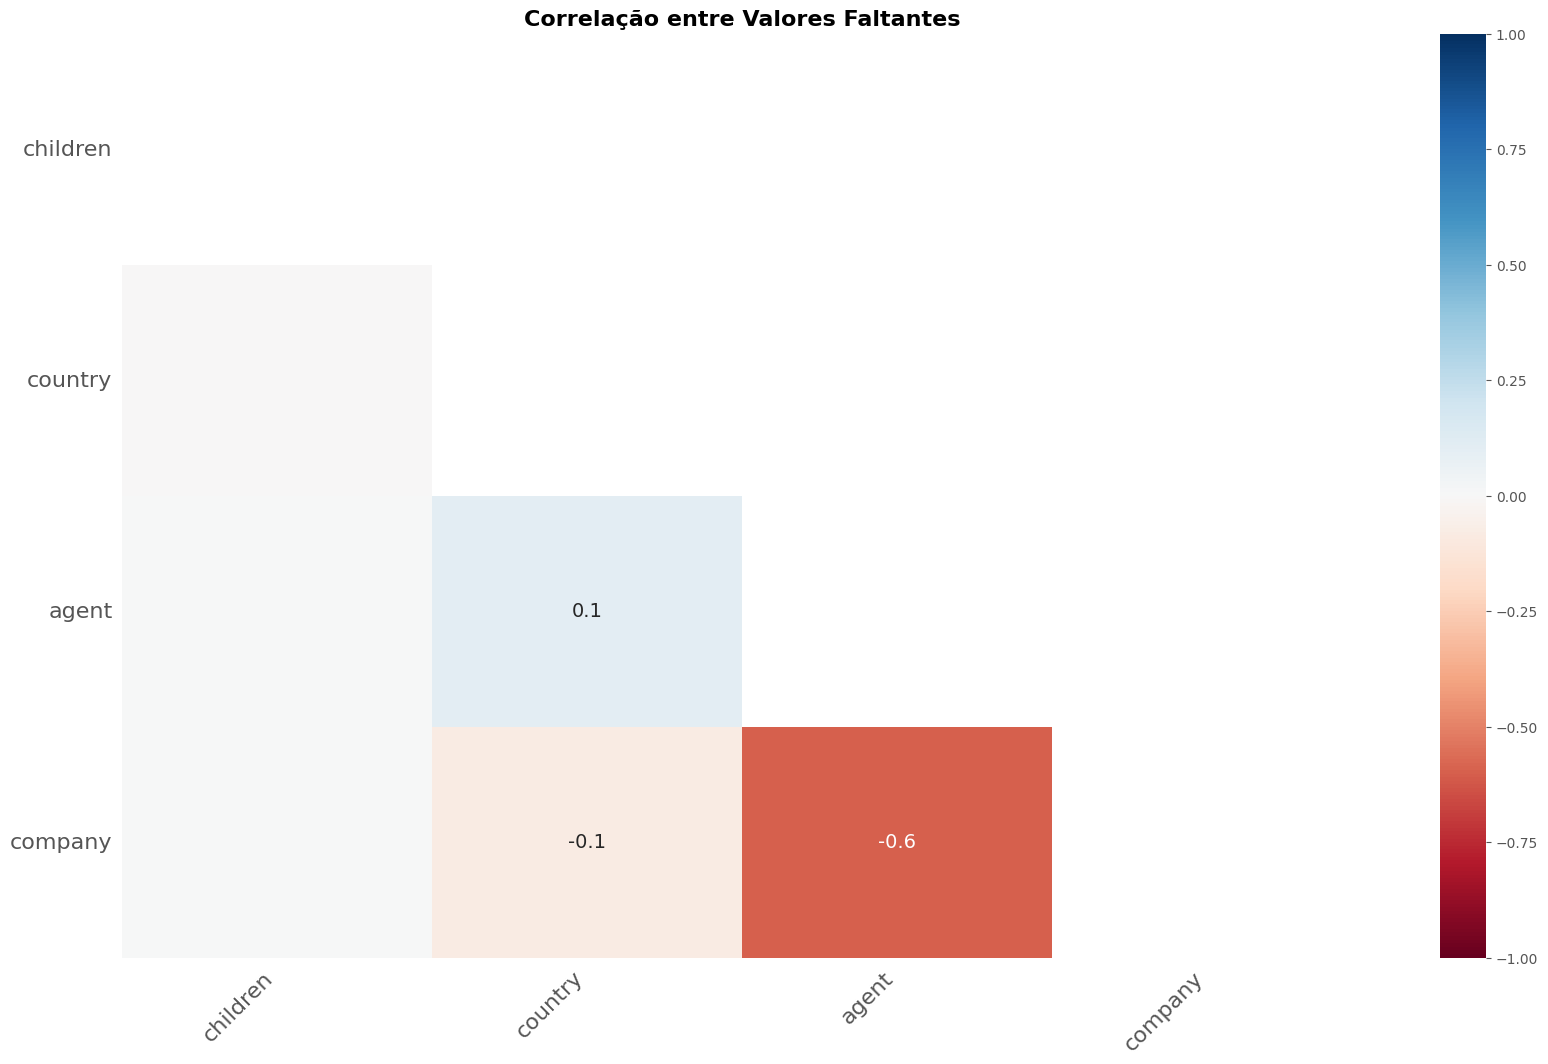

In [11]:
# Heatmap de correlação de missing values
plt.figure(figsize=(10, 6))
msno.heatmap(df)
plt.title('Correlação entre Valores Faltantes', fontsize=16, fontweight='bold')
plt.show()

In [12]:
print("📈 ESTATÍSTICAS DESCRITIVAS - COLUNAS NUMÉRICAS:")
display(df.describe().T)

print("\n📊 ESTATÍSTICAS DESCRITIVAS - COLUNAS CATEGÓRICAS:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

📈 ESTATÍSTICAS DESCRITIVAS - COLUNAS NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0



📊 ESTATÍSTICAS DESCRITIVAS - COLUNAS CATEGÓRICAS:

hotel:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

arrival_date_month:
arrival_date_month
August     13877
July       12661
May        11791
October    11160
April      11089
Name: count, dtype: int64

meal:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

country:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: count, dtype: int64

market_segment:
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Name: count, dtype: int64

distribution_channel:
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

reserved_room_type:
reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
Name: count, dtype: int64

assigned_roo

🎯 ANÁLISE DA VARIÁVEL TARGET - is_canceled


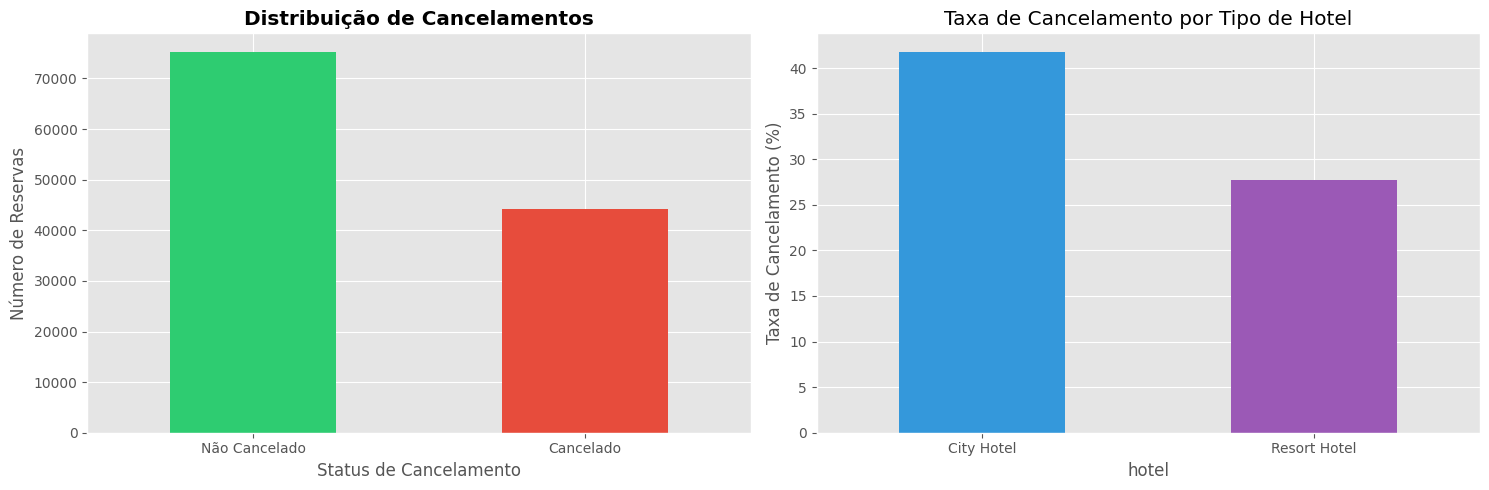

📊 Taxa Geral de Cancelamento: 37.04%
🏨 Taxa Cancelamento City Hotel: 41.73%
🏖️ Taxa Cancelamento Resort Hotel: 27.76%


In [13]:
print("🎯 ANÁLISE DA VARIÁVEL TARGET - is_canceled")

# Distribuição de cancelamentos
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
cancel_counts = df['is_canceled'].value_counts()
cancel_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c']) # Alterado para gráfico de barras
plt.title('Distribuição de Cancelamentos', fontweight='bold')
plt.xlabel('Status de Cancelamento')
plt.ylabel('Número de Reservas')
plt.xticks(ticks=[0, 1], labels=['Não Cancelado', 'Cancelado'], rotation=0)


plt.subplot(1, 2, 2)
cancel_by_hotel = df.groupby('hotel')['is_canceled'].mean() * 100
cancel_by_hotel.plot(kind='bar', color=['#3498db', '#9b59b6'])
plt.title('Taxa de Cancelamento por Tipo de Hotel')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"📊 Taxa Geral de Cancelamento: {df['is_canceled'].mean()*100:.2f}%")
print(f"🏨 Taxa Cancelamento City Hotel: {cancel_by_hotel['City Hotel']:.2f}%")
print(f"🏖️ Taxa Cancelamento Resort Hotel: {cancel_by_hotel['Resort Hotel']:.2f}%")

📅 ANÁLISE TEMPORAL DAS RESERVAS


<Figure size 1500x800 with 0 Axes>

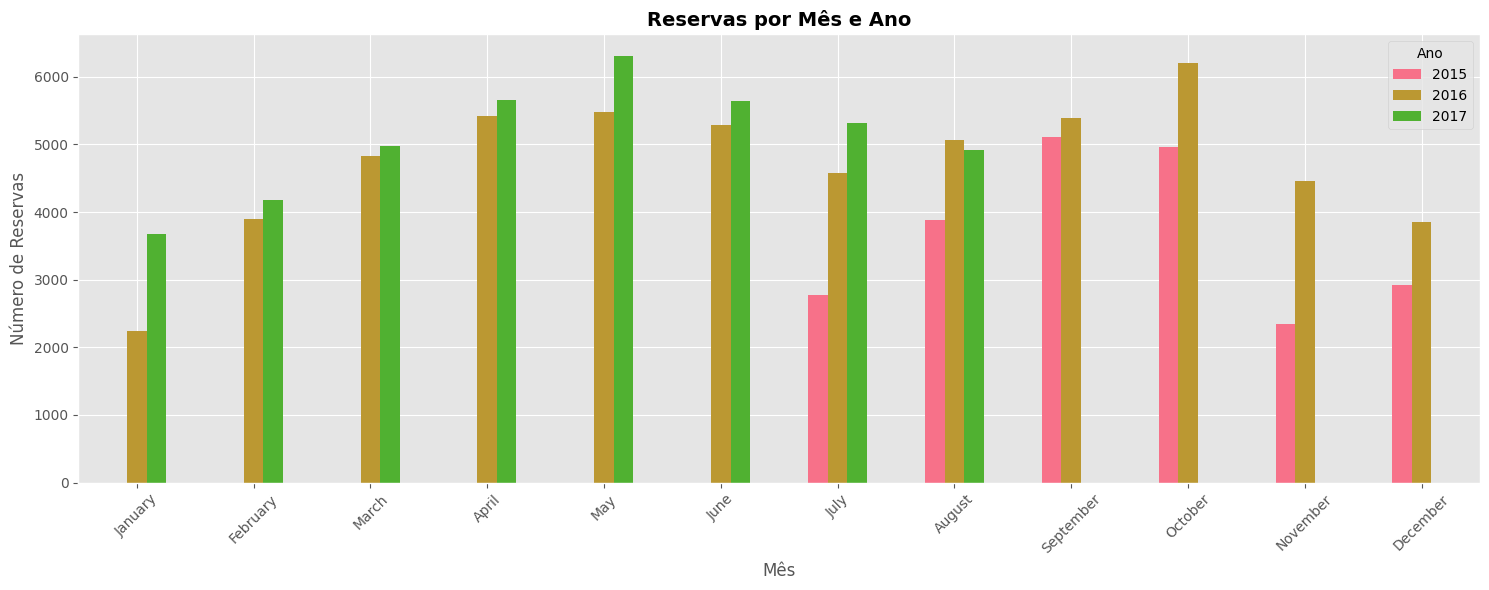

In [14]:
print("📅 ANÁLISE TEMPORAL DAS RESERVAS")

# Criar coluna de data completa
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)

# Análise por mês
monthly_bookings = df.groupby(['arrival_date_year', 'arrival_date_month']).size().unstack(0)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_bookings = monthly_bookings.reindex(month_order)

plt.figure(figsize=(15, 8))
monthly_bookings.plot(kind='bar', figsize=(15, 6))
plt.title('Reservas por Mês e Ano', fontweight='bold', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

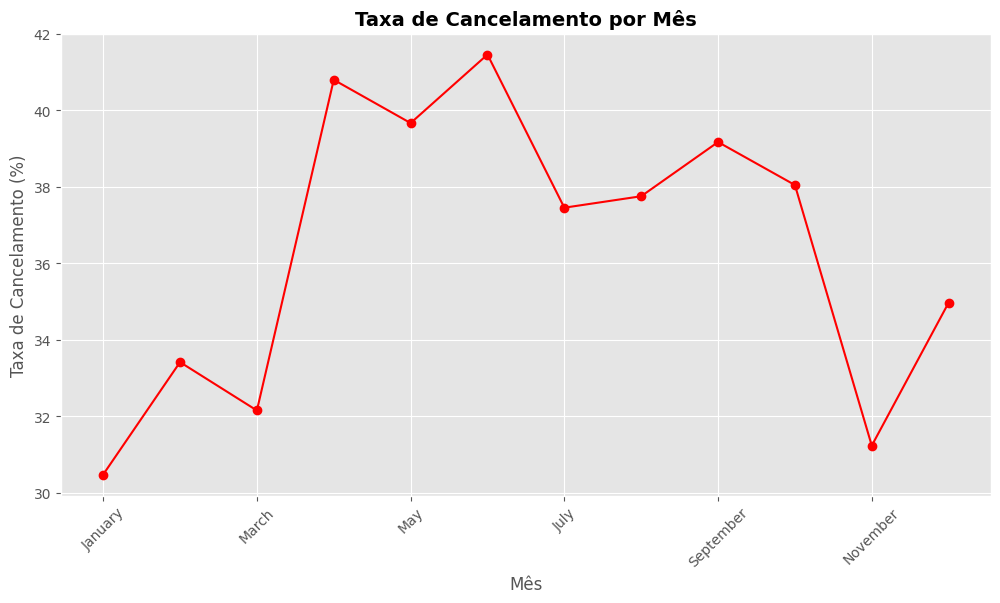

In [15]:
# Taxa de cancelamento mensal
monthly_cancel = df.groupby('arrival_date_month')['is_canceled'].mean() * 100
monthly_cancel = monthly_cancel.reindex(month_order)

plt.figure(figsize=(12, 6))
monthly_cancel.plot(kind='line', marker='o', color='red')
plt.title('Taxa de Cancelamento por Mês', fontweight='bold', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

🌎 ANÁLISE GEOGRÁFICA - DISTRIBUIÇÃO POR PAÍSES


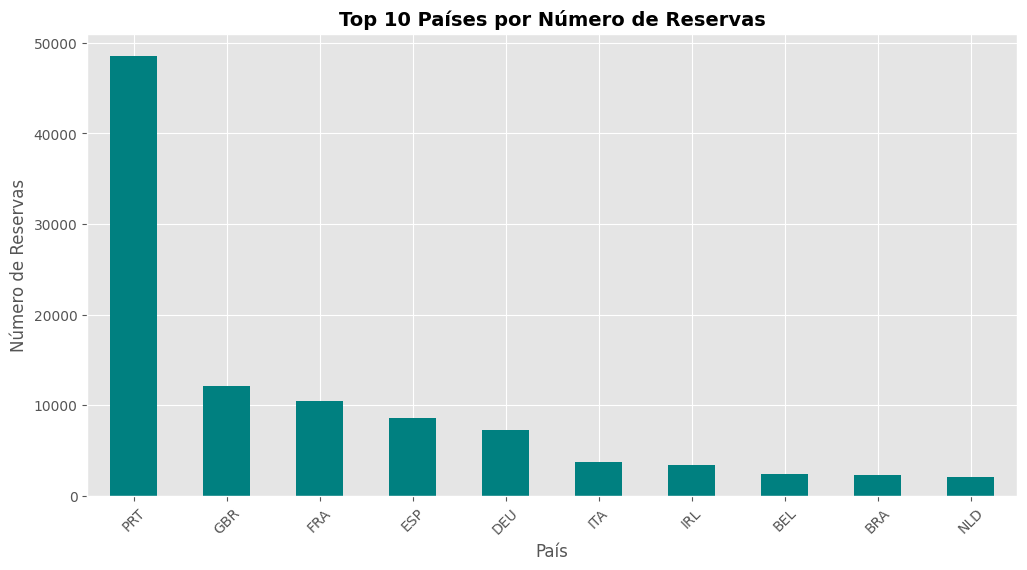

In [16]:
print("🌎 ANÁLISE GEOGRÁFICA - DISTRIBUIÇÃO POR PAÍSES")

# Top 10 países com mais reservas
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='teal')
plt.title('Top 10 Países por Número de Reservas', fontweight='bold', fontsize=14)
plt.xlabel('País')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.show()

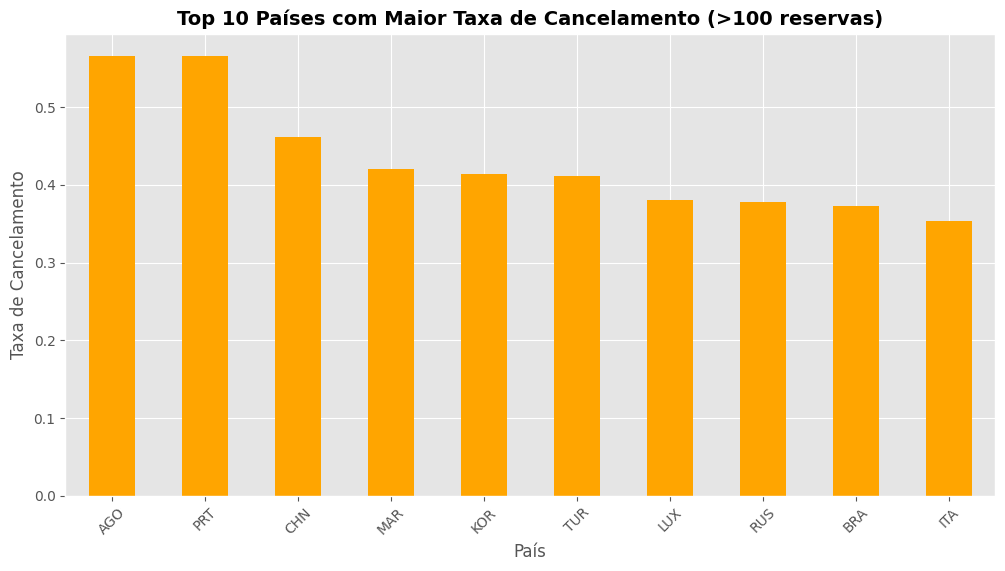

In [17]:
# Taxa de cancelamento por país (apenas países com +100 reservas)
country_stats = df.groupby('country').agg({
    'is_canceled': ['count', 'mean']
}).round(3)
country_stats.columns = ['total_reservas', 'taxa_cancelamento']
country_stats = country_stats[country_stats['total_reservas'] > 100]
top_cancel_countries = country_stats.sort_values('taxa_cancelamento', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_cancel_countries['taxa_cancelamento'].plot(kind='bar', color='orange')
plt.title('Top 10 Países com Maior Taxa de Cancelamento (>100 reservas)', fontweight='bold', fontsize=14)
plt.xlabel('País')
plt.ylabel('Taxa de Cancelamento')
plt.xticks(rotation=45)
plt.show()

💰 ANÁLISE DE PREÇOS E TARIFAS


Text(0, 0.5, 'Frequência')

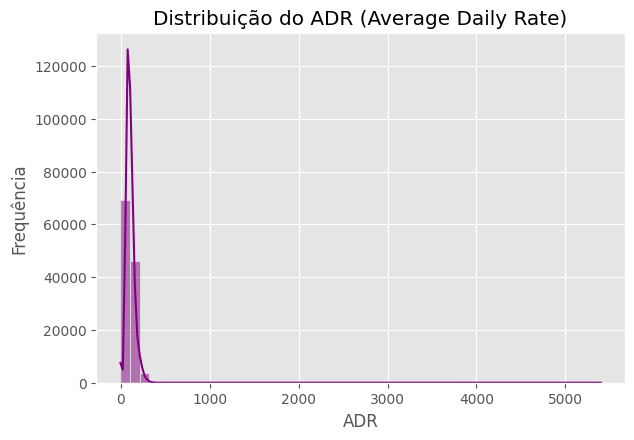

In [18]:
print("💰 ANÁLISE DE PREÇOS E TARIFAS")

plt.figure(figsize=(15, 10))

# Distribuição do ADR (Average Daily Rate)
plt.subplot(2, 2, 1)
sns.histplot(df['adr'], bins=50, kde=True, color='purple')
plt.title('Distribuição do ADR (Average Daily Rate)')
plt.xlabel('ADR')
plt.ylabel('Frequência')

Text(0.5, 0, 'Tipo de Hotel')

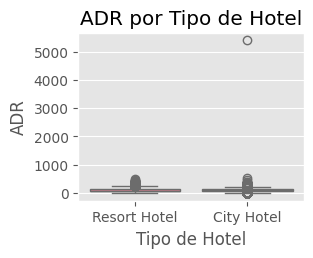

In [19]:
# ADR por tipo de hotel
plt.subplot(2, 2, 2)
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('ADR por Tipo de Hotel')
plt.ylabel('ADR')
plt.xlabel('Tipo de Hotel')

Text(0.5, 0, 'Cancelado (0=Não, 1=Sim)')

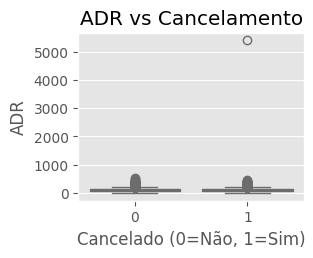

In [20]:
# ADR vs Cancelamento
plt.subplot(2, 2, 3)
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('ADR vs Cancelamento')
plt.ylabel('ADR')
plt.xlabel('Cancelado (0=Não, 1=Sim)')

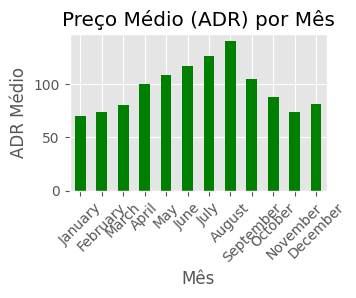

In [21]:
# Preço médio por mês
plt.subplot(2, 2, 4)
monthly_adr = df.groupby('arrival_date_month')['adr'].mean()
monthly_adr = monthly_adr.reindex(month_order)
monthly_adr.plot(kind='bar', color='green')
plt.title('Preço Médio (ADR) por Mês')
plt.xlabel('Mês')
plt.ylabel('ADR Médio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
# Remover outliers extremos para melhor visualização
df_clean = df[df['adr'] < 1000]

print(f"📊 Estatísticas do ADR (limpo):")
print(f"Média: ${df_clean['adr'].mean():.2f}")
print(f"Mediana: ${df_clean['adr'].median():.2f}")
print(f"Máximo: ${df_clean['adr'].max():.2f}")
print(f"Mínimo: ${df_clean['adr'].min():.2f}")

📊 Estatísticas do ADR (limpo):
Média: $101.79
Mediana: $94.56
Máximo: $510.00
Mínimo: $-6.38


⏰ ANÁLISE DE LEAD TIME (ANTECEDÊNCIA DA RESERVA)


Text(0, 0.5, 'Frequência')

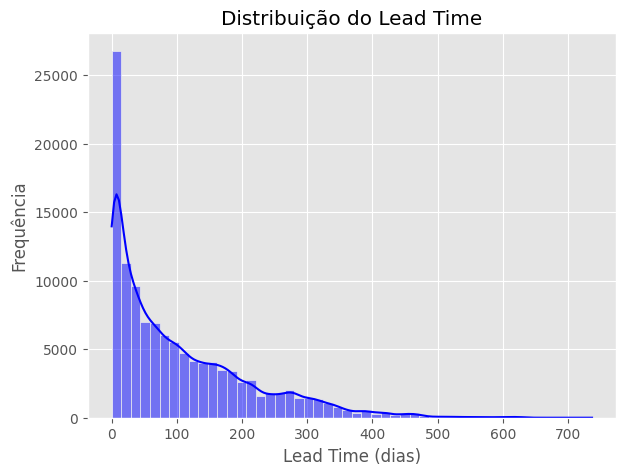

In [23]:
print("⏰ ANÁLISE DE LEAD TIME (ANTECEDÊNCIA DA RESERVA)")

plt.figure(figsize=(15, 5))

# Distribuição do lead time
plt.subplot(1, 2, 1)
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribuição do Lead Time')
plt.xlabel('Lead Time (dias)')
plt.ylabel('Frequência')

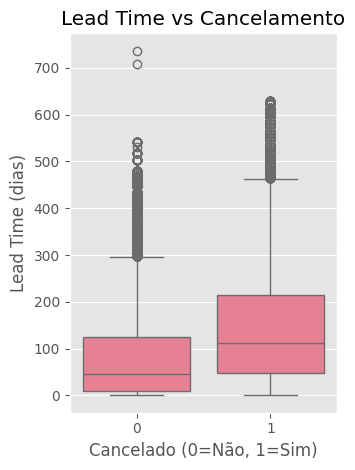

In [24]:
# Lead time vs Cancelamento
plt.subplot(1, 2, 2)
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancelamento')
plt.xlabel('Cancelado (0=Não, 1=Sim)')
plt.ylabel('Lead Time (dias)')

plt.tight_layout()
plt.show()

In [25]:
# Análise mais detalhada
print("📊 Estatísticas de Lead Time:")
print(f"Lead Time Médio: {df['lead_time'].mean():.1f} dias")
print(f"Lead Time Médio para cancelamentos: {df[df['is_canceled']==1]['lead_time'].mean():.1f} dias")
print(f"Lead Time Médio para não cancelamentos: {df[df['is_canceled']==0]['lead_time'].mean():.1f} dias")

📊 Estatísticas de Lead Time:
Lead Time Médio: 104.0 dias
Lead Time Médio para cancelamentos: 144.8 dias
Lead Time Médio para não cancelamentos: 80.0 dias


In [26]:
# Correlação entre lead time e cancelamento
correlation = df['lead_time'].corr(df['is_canceled'])
print(f"📈 Correlação entre Lead Time e Cancelamento: {correlation:.3f}")

📈 Correlação entre Lead Time e Cancelamento: 0.293


🏢 ANÁLISE DE SEGMENTO DE MERCADO E CANAL DE DISTRIBUIÇÃO


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Online TA'),
  Text(1, 0, 'Offline TA/TO'),
  Text(2, 0, 'Groups'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Corporate'),
  Text(5, 0, 'Complementary'),
  Text(6, 0, 'Aviation'),
  Text(7, 0, 'Undefined')])

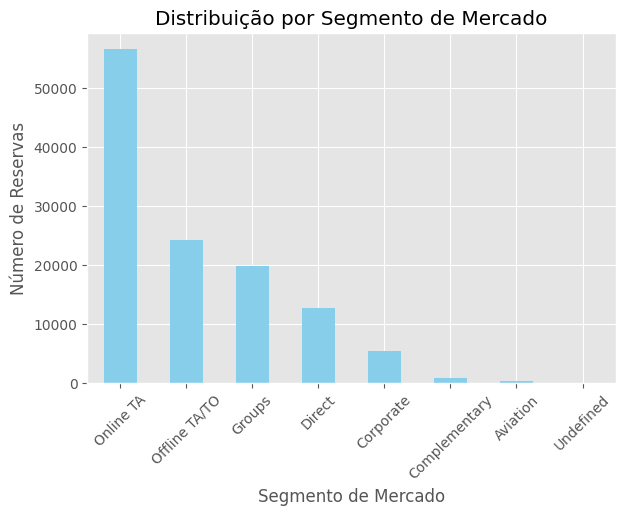

In [27]:
print("🏢 ANÁLISE DE SEGMENTO DE MERCADO E CANAL DE DISTRIBUIÇÃO")

plt.figure(figsize=(15, 10))

# Distribuição por segmento de mercado
plt.subplot(2, 2, 1)
market_segment_counts = df['market_segment'].value_counts()
market_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

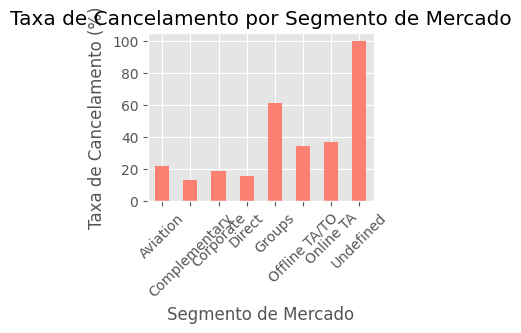

In [28]:
# Taxa de cancelamento por segmento
plt.subplot(2, 2, 2)
cancel_by_segment = df.groupby('market_segment')['is_canceled'].mean() * 100
cancel_by_segment.plot(kind='bar', color='salmon')
plt.title('Taxa de Cancelamento por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA/TO'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'GDS'),
  Text(4, 0, 'Undefined')])

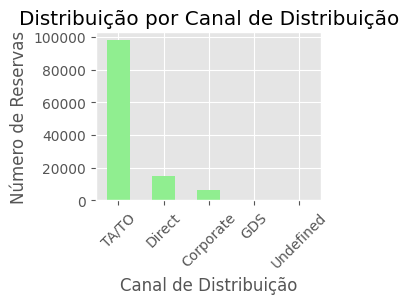

In [29]:
# Distribuição por canal de distribuição
plt.subplot(2, 2, 3)
distribution_channel_counts = df['distribution_channel'].value_counts()
distribution_channel_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribuição por Canal de Distribuição')
plt.xlabel('Canal de Distribuição')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)

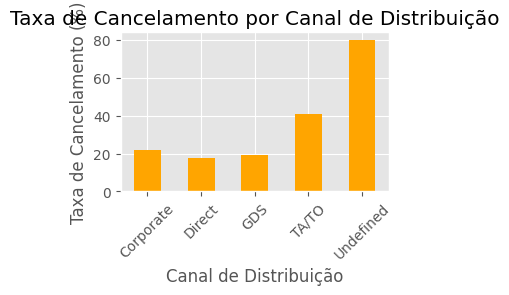

In [30]:
# Taxa de cancelamento por canal
plt.subplot(2, 2, 4)
cancel_by_channel = df.groupby('distribution_channel')['is_canceled'].mean() * 100
cancel_by_channel.plot(kind='bar', color='orange')
plt.title('Taxa de Cancelamento por Canal de Distribuição')
plt.xlabel('Canal de Distribuição')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

👥 ANÁLISE DE TIPOS DE CLIENTE


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Transient'),
  Text(1, 0, 'Transient-Party'),
  Text(2, 0, 'Contract'),
  Text(3, 0, 'Group')])

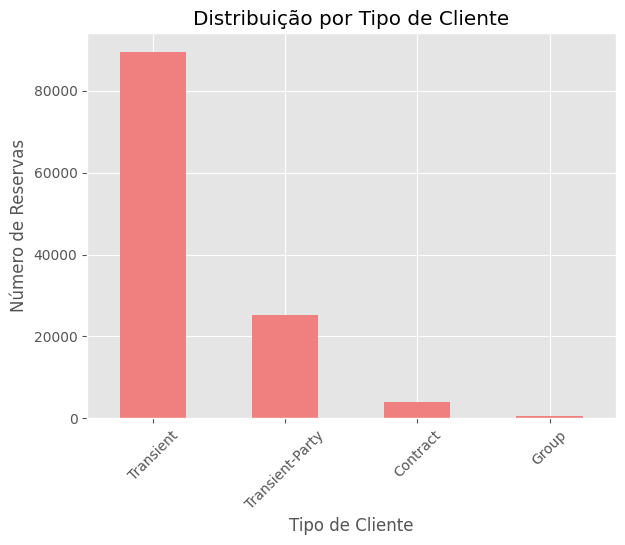

In [31]:
print("👥 ANÁLISE DE TIPOS DE CLIENTE")

plt.figure(figsize=(15, 5))

# Distribuição por tipo de cliente
plt.subplot(1, 2, 1)
customer_type_counts = df['customer_type'].value_counts()
customer_type_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribuição por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)

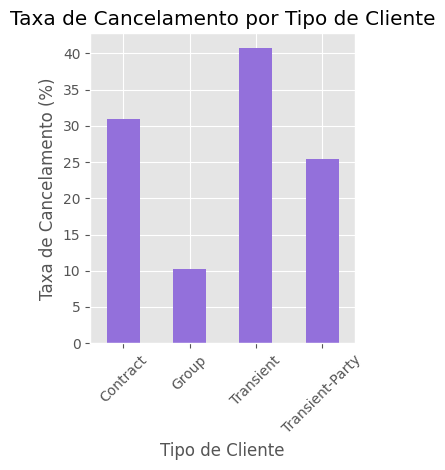

In [32]:
# Taxa de cancelamento por tipo de cliente
plt.subplot(1, 2, 2)
cancel_by_customer = df.groupby('customer_type')['is_canceled'].mean() * 100
cancel_by_customer.plot(kind='bar', color='mediumpurple')
plt.title('Taxa de Cancelamento por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [33]:
# Análise detalhada por tipo de cliente
customer_analysis = df.groupby('customer_type').agg({
    'is_canceled': 'mean',
    'adr': 'mean',
    'lead_time': 'mean',
    'total_of_special_requests': 'mean'
}).round(3)

customer_analysis.columns = ['taxa_cancelamento', 'adr_medio', 'lead_time_medio', 'solicitacoes_especiais_media']
display(customer_analysis)

,taxa_cancelamento,adr_medio,lead_time_medio,solicitacoes_especiais_media
customer_type,,,,
Contract,0.310,87.550,142.970,0.729
Group,0.102,83.489,55.057,0.645
Transient,0.407,107.014,93.296,0.632
Transient-Party,0.254,86.084,137.037,0.329


In [34]:
print("📊 MATRIZ DE CORRELAÇÕES")

# Selecionar apenas colunas numéricas para correlação
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Focar nas correlações com a variável target
target_correlations = correlation_matrix['is_canceled'].sort_values(ascending=False)

print("🔝 Principais correlações com Cancelamento:")
display(target_correlations)

📊 MATRIZ DE CORRELAÇÕES
🔝 Principais correlações com Cancelamento:


,is_canceled
is_canceled,1.000000
lead_time,0.293123
previous_cancellations,0.110133
adults,0.060017
days_in_waiting_list,0.054186
adr,0.047557
stays_in_week_nights,0.024765
arrival_date_year,0.016660
arrival_date_week_number,0.008148
children,0.005048


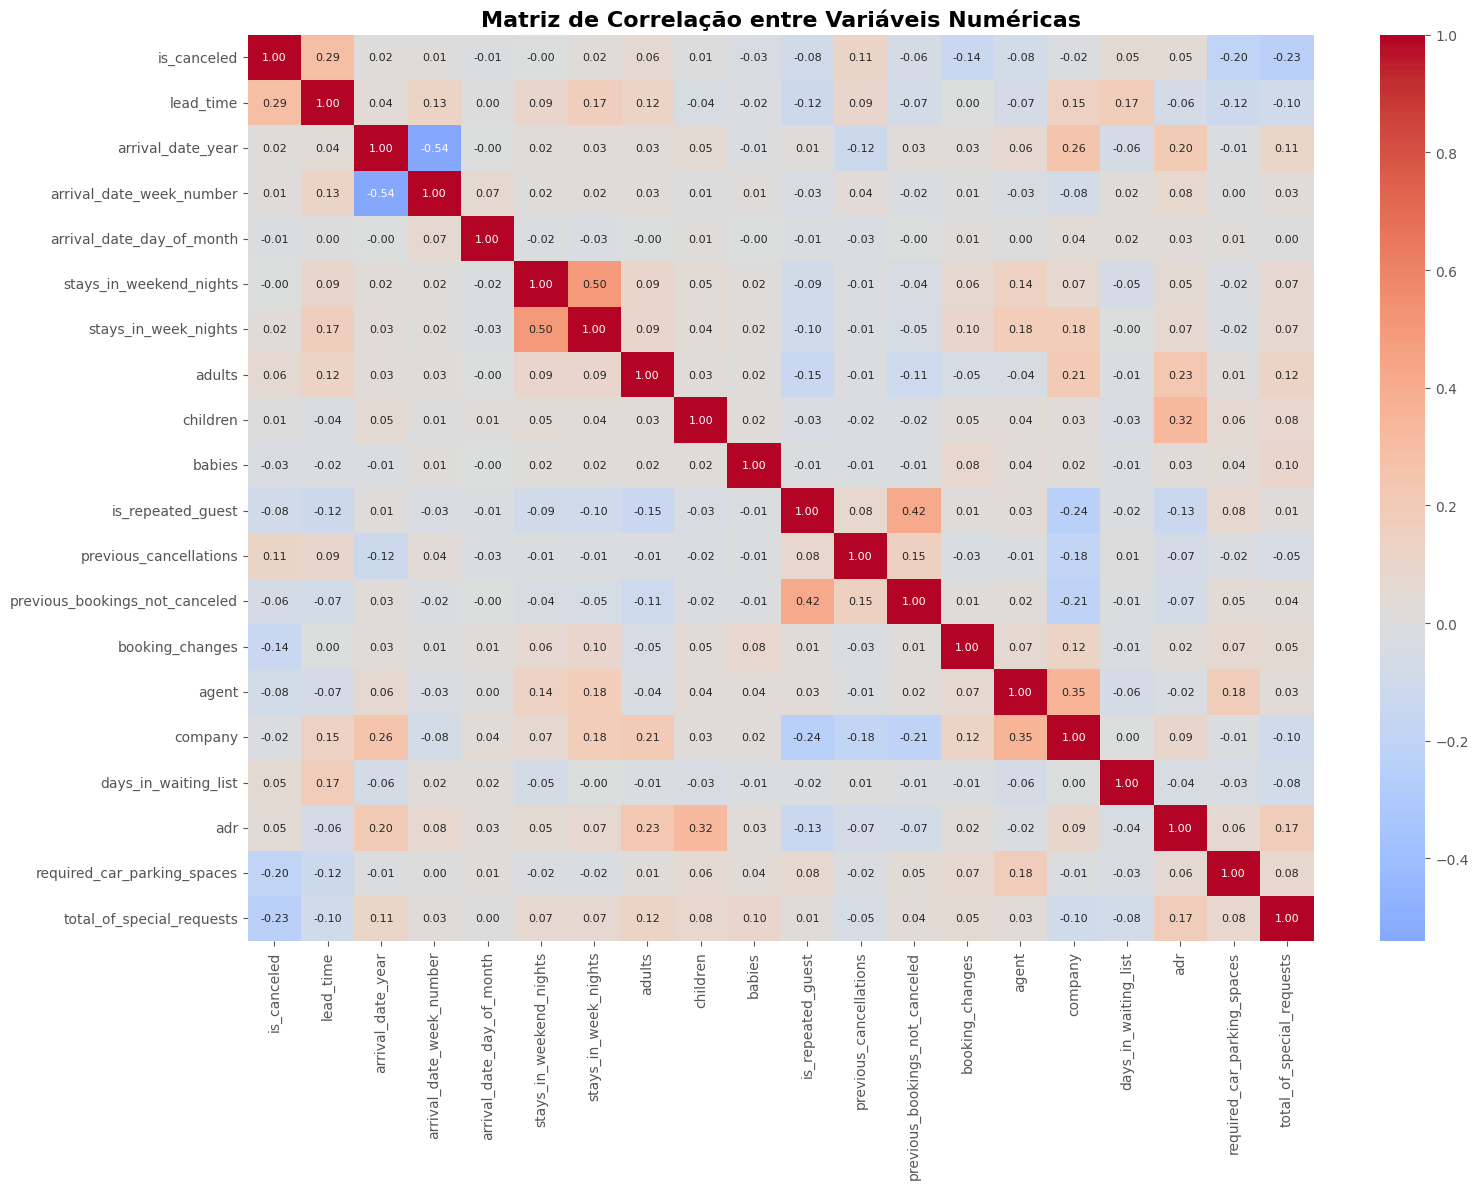

🎯 Variáveis com maior correlação com cancelamento (|corr| > 0.1):


,is_canceled
lead_time,0.293123
previous_cancellations,0.110133
booking_changes,-0.144381
required_car_parking_spaces,-0.195498
total_of_special_requests,-0.234658


In [35]:
# Heatmap das correlações
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            annot_kws={'size': 8}, fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Correlações mais fortes com cancelamento
strong_correlations = target_correlations[(abs(target_correlations) > 0.1) & (target_correlations != 1.0)]
print("🎯 Variáveis com maior correlação com cancelamento (|corr| > 0.1):")
display(strong_correlations)

🎨 ANÁLISE MULTIVARIADA AVANÇADA


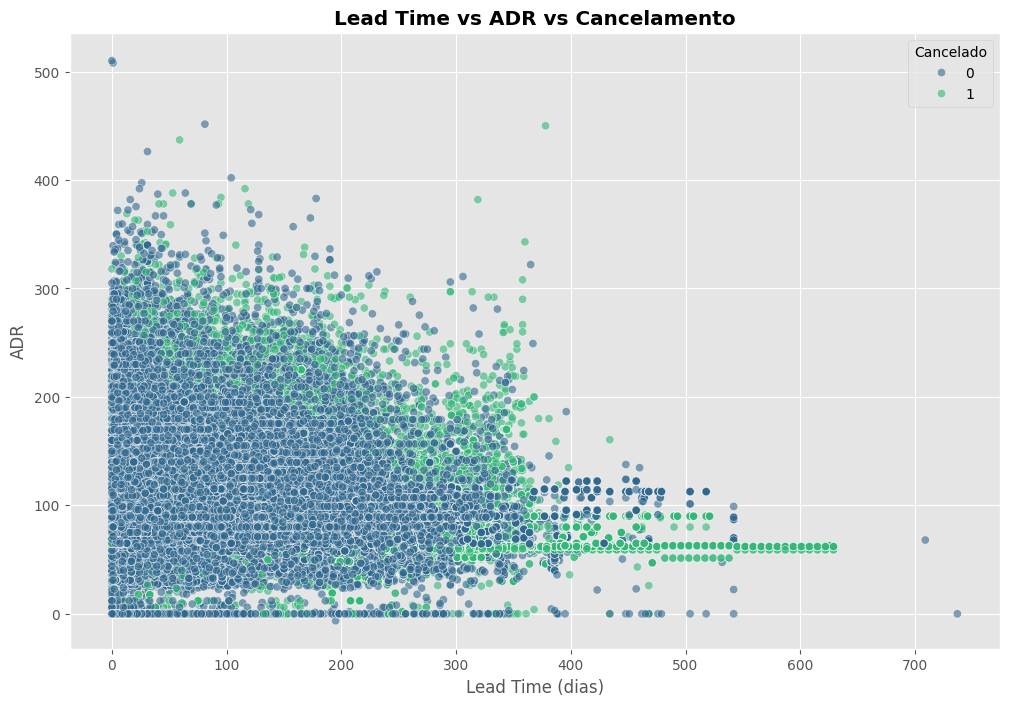

In [36]:
print("🎨 ANÁLISE MULTIVARIADA AVANÇADA")

# 1. Lead Time vs ADR vs Cancelamento
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lead_time', y='adr', hue='is_canceled',
                data=df[df['adr'] < 1000], alpha=0.6, palette='viridis')
plt.title('Lead Time vs ADR vs Cancelamento', fontweight='bold')
plt.xlabel('Lead Time (dias)')
plt.ylabel('ADR')
plt.legend(title='Cancelado')
plt.show()

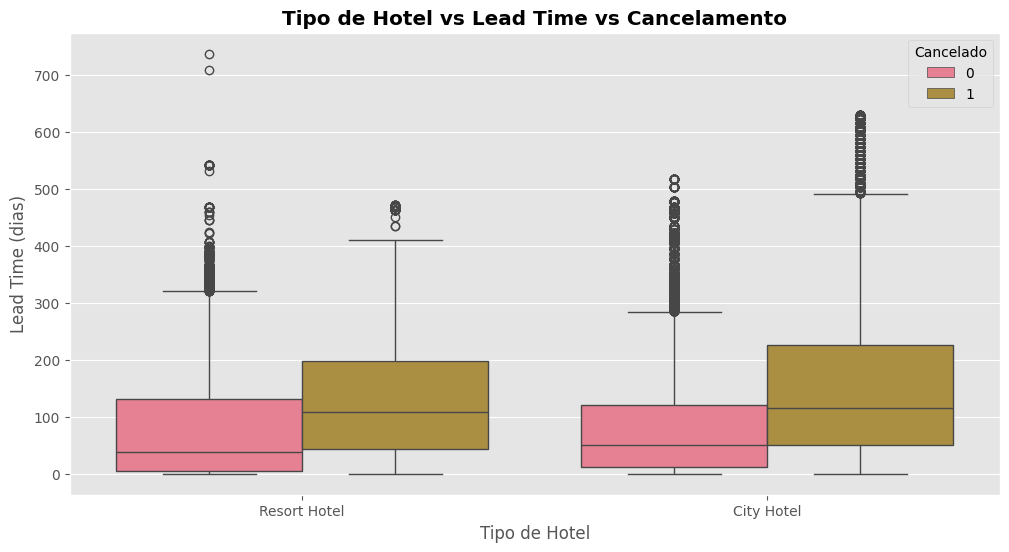

In [37]:
# 2. Tipo de Hotel vs Lead Time vs Cancelamento
plt.figure(figsize=(12, 6))
sns.boxplot(x='hotel', y='lead_time', hue='is_canceled', data=df)
plt.title('Tipo de Hotel vs Lead Time vs Cancelamento', fontweight='bold')
plt.ylabel('Lead Time (dias)')
plt.xlabel('Tipo de Hotel')
plt.legend(title='Cancelado')
plt.show()

<Figure size 1400x800 with 0 Axes>

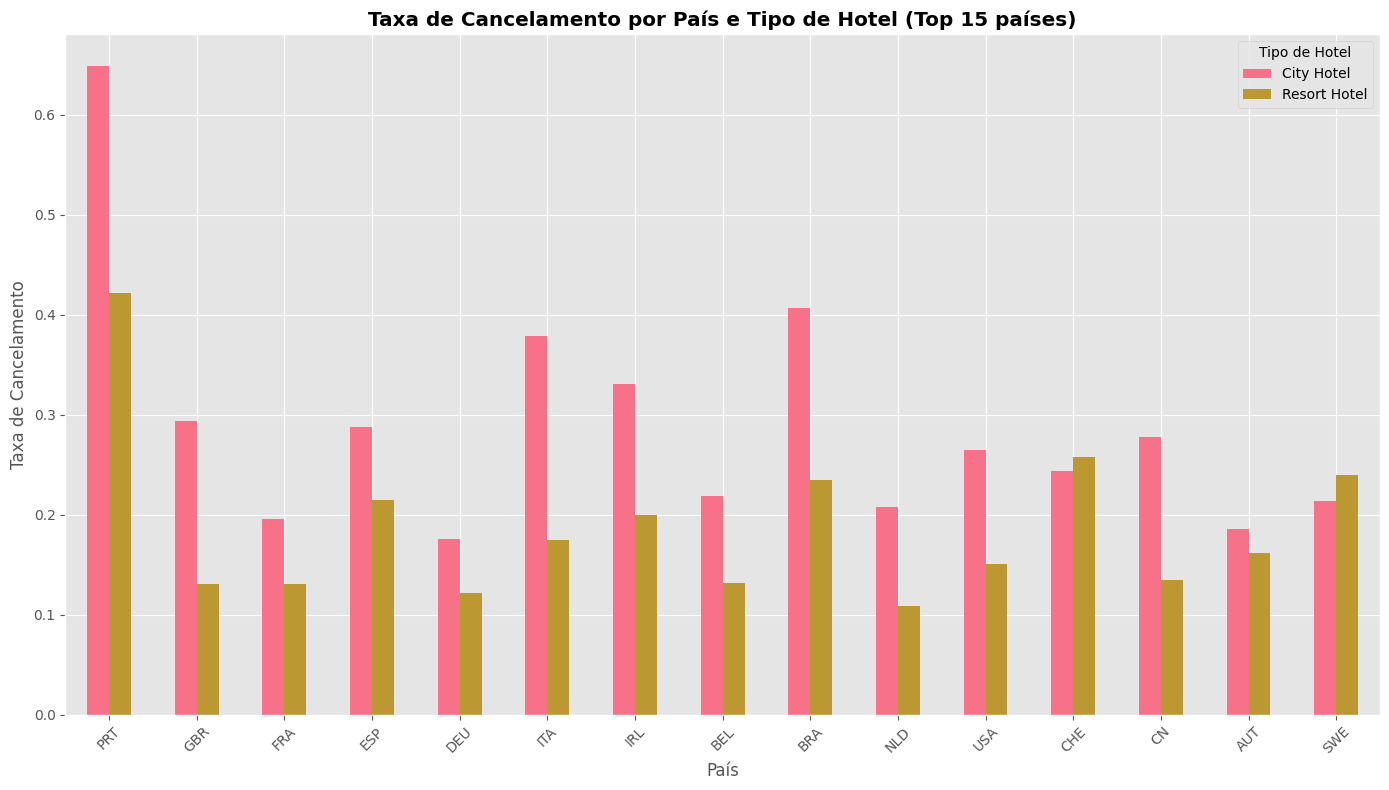

In [38]:
# 3. Análise de cancelamentos por país e tipo de hotel
pivot_table = df.pivot_table(values='is_canceled',
                            index='country',
                            columns='hotel',
                            aggfunc='mean',
                            fill_value=0)

# Top 15 países com maior taxa de cancelamento
top_countries = df['country'].value_counts().head(15).index
pivot_table_filtered = pivot_table.loc[top_countries]

plt.figure(figsize=(14, 8))
pivot_table_filtered.plot(kind='bar', figsize=(14, 8))
plt.title('Taxa de Cancelamento por País e Tipo de Hotel (Top 15 países)', fontweight='bold')
plt.ylabel('Taxa de Cancelamento')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Hotel')
plt.tight_layout()
plt.show()

In [39]:
print("🎯 INSIGHTS E RECOMENDAÇÕES FINAIS")

print("=" * 60)
print("PRINCIPAIS DESCOBERTAS:")
print("=" * 60)

# Insights calculados programaticamente
cancel_rate = df['is_canceled'].mean() * 100
lead_time_cancel = df[df['is_canceled'] == 1]['lead_time'].mean()
lead_time_no_cancel = df[df['is_canceled'] == 0]['lead_time'].mean()
adr_cancel = df[df['is_canceled'] == 1]['adr'].mean()
adr_no_cancel = df[df['is_canceled'] == 0]['adr'].mean()

print(f"1. 📉 Taxa geral de cancelamento: {cancel_rate:.1f}%")
print(f"2. ⏰ Reservas canceladas têm lead time MUITO maior: {lead_time_cancel:.1f} dias vs {lead_time_no_cancel:.1f} dias")
print(f"3. 💰 Reservas canceladas têm ADR ligeiramente menor: ${adr_cancel:.2f} vs ${adr_no_cancel:.2f}")
print(f"4. 🏨 City Hotel tem maior taxa de cancelamento: {cancel_by_hotel['City Hotel']:.1f}% vs {cancel_by_hotel['Resort Hotel']:.1f}%")
print(f"5. 📊 Lead Time é a variável mais correlacionada com cancelamento: {correlation_matrix['is_canceled']['lead_time']:.3f}")

print("\n" + "=" * 60)
print("RECOMENDAÇÕES PARA REDUZIR CANCELAMENTOS:")
print("=" * 60)
print("🎯 1. Implementar política diferenciada para reservas com lead time > 100 dias")
print("🎯 2. Criar campanhas especiais para grupos com alta taxa de cancelamento")
print("🎯 3. Revisar estratégia de preços para City Hotel")
print("🎯 4. Melhorar comunicação com hóspedes que fazem reservas com muita antecedência")
print("🎯 5. Oferecer benefícios para reservas não canceláveis em períodos de alta demanda")

print("\n" + "=" * 60)
print("PRÓXIMOS PASSOS PARA MODELAGEM DE ML:")
print("=" * 60)
print("🤖 1. Pré-processamento: Tratar valores faltantes em 'company', 'agent', 'country'")
print("🤖 2. Feature Engineering: Criar variáveis como 'season', 'total_guests', 'total_nights'")
print("🤖 3. Encoding: Converter variáveis categóricas usando One-Hot Encoding")
print("🤖 4. Modelagem: Testar Random Forest, XGBoost e Logistic Regression")
print("🤖 5. Otimização: Usar GridSearch para tuning de hiperparâmetros")

🎯 INSIGHTS E RECOMENDAÇÕES FINAIS
PRINCIPAIS DESCOBERTAS:
1. 📉 Taxa geral de cancelamento: 37.0%
2. ⏰ Reservas canceladas têm lead time MUITO maior: 144.8 dias vs 80.0 dias
3. 💰 Reservas canceladas têm ADR ligeiramente menor: $104.96 vs $99.99
4. 🏨 City Hotel tem maior taxa de cancelamento: 41.7% vs 27.8%
5. 📊 Lead Time é a variável mais correlacionada com cancelamento: 0.293

RECOMENDAÇÕES PARA REDUZIR CANCELAMENTOS:
🎯 1. Implementar política diferenciada para reservas com lead time > 100 dias
🎯 2. Criar campanhas especiais para grupos com alta taxa de cancelamento
🎯 3. Revisar estratégia de preços para City Hotel
🎯 4. Melhorar comunicação com hóspedes que fazem reservas com muita antecedência
🎯 5. Oferecer benefícios para reservas não canceláveis em períodos de alta demanda

PRÓXIMOS PASSOS PARA MODELAGEM DE ML:
🤖 1. Pré-processamento: Tratar valores faltantes em 'company', 'agent', 'country'
🤖 2. Feature Engineering: Criar variáveis como 'season', 'total_guests', 'total_nights'
🤖 3.

In [40]:
print("💾 SALVANDO RESULTADOS DA ANÁLISE")

# Salvar dataset com algumas transformações úteis
df.to_csv('hotel_bookings_analyzed.csv', index=False)

# Salvar estatísticas importantes
summary_stats = {
    'total_reservas': df.shape[0],
    'taxa_cancelamento': df['is_canceled'].mean(),
    'lead_time_medio': df['lead_time'].mean(),
    'adr_medio': df['adr'].mean(),
    'hotel_counts': df['hotel'].value_counts().to_dict(),
    'top_countries': df['country'].value_counts().head(5).to_dict()
}

import json
with open('analysis_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=4)

print("✅ Análise concluída e resultados salvos!")
print("📁 Arquivos gerados:")
print("   - hotel_bookings_analyzed.csv")
print("   - analysis_summary.json")
print("   - Gráficos e visualizações")

💾 SALVANDO RESULTADOS DA ANÁLISE
✅ Análise concluída e resultados salvos!
📁 Arquivos gerados:
   - hotel_bookings_analyzed.csv
   - analysis_summary.json
   - Gráficos e visualizações
